In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from scipy.io import loadmat

In [2]:
# Data import
mnist = loadmat(r"mnist-original.mat")
# Convert training data to normalised vector
images = (mnist["data"].T/256)

In [58]:
X, Y = [],[]

for image in images[1:1000]:
    for i in range(27):
        X.append(image[i:i+28])
        Y.append(image[i+28:i+28*2])

X = torch.tensor(np.array(X))
Y = torch.tensor(np.array(Y))

In [59]:
X.shape

torch.Size([26973, 28])

In [60]:
g = torch.Generator().manual_seed(2000000)
w1 = torch.randn((28,28), generator=g, dtype=torch.float64)
w2 = torch.randn((28,200), generator=g, dtype=torch.float64)
w3 = torch.randn((200,28), generator=g, dtype=torch.float64)

parameters = [w1, w2, w3]
nparameters = sum(p.nelement() for p in parameters)
print(f'{nparameters} parameters')

for p in parameters:
    p.requires_grad = True


11984 parameters


In [61]:
for i in range(10000):
    Z_1 = X @ w1
    Z_2 = torch.tanh(Z_1 @ w2)
    Z_3 = Z_2 @ w3
    loss = F.cross_entropy(Z_3, Y)
    loss.backward()
    
        
    for p in parameters:
        p.data += -0.01  * p.grad

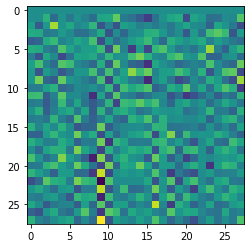

In [57]:
ctx = torch.tensor([0.1]*28, dtype=torch.float64)

for i in range(27):

    z_1 = ctx[i*28:(i+1)*28] @ w1
    z_2 = torch.tanh(z_1 @ w2)
    z_3 = z_2 @ w3

    ctx = torch.cat((ctx, z_3), 0)

plt.imshow(ctx.reshape((28,28)).detach())


